# Loan prediction 

In [2]:
#Including libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
#Reading csv file
dataset = pd.read_csv('train.csv')

In [3]:
# print top 5 records in the dataset
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# print data(feature)shape
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

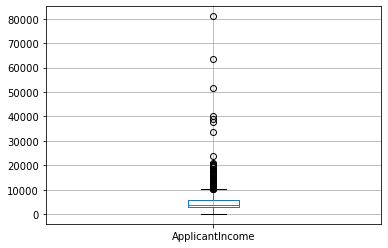

In [7]:
dataset.boxplot(column= "ApplicantIncome")

<AxesSubplot:>

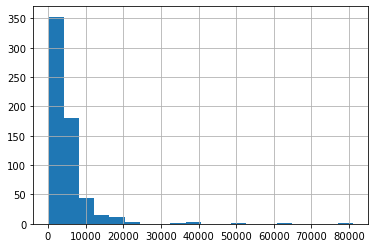

In [8]:
dataset["ApplicantIncome"].hist(bins=20) # plot is right skewed so we have to normalize it

<AxesSubplot:>

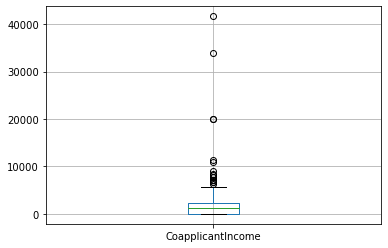

In [9]:
dataset.boxplot(column="CoapplicantIncome")

<AxesSubplot:>

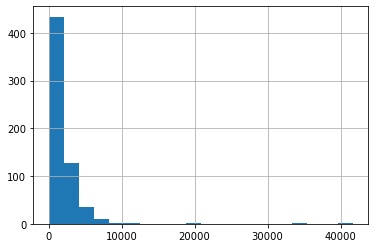

In [10]:
dataset["CoapplicantIncome"].hist(bins=20) #The plot is right skewed so we have to normalize it

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='[Education, Gender]'>

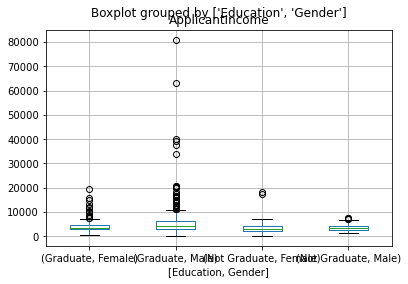

In [11]:
dataset.boxplot(column="ApplicantIncome" ,by=["Education","Gender"])

<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='[Education, Gender]'>

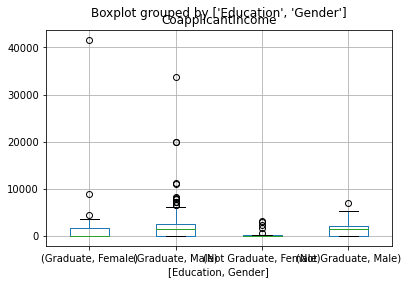

In [12]:
dataset.boxplot(column='CoapplicantIncome', by= ["Education","Gender"])

<AxesSubplot:>

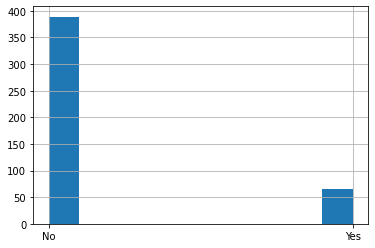

In [13]:
#People who are graduated and self employed 
df_temp=dataset[dataset["Education"] == "Graduate"]
df_temp["Self_Employed"].hist()

<AxesSubplot:>

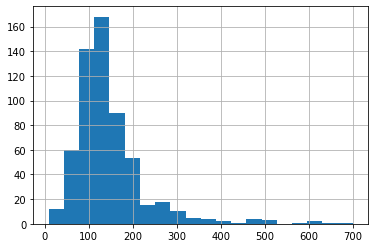

In [14]:
dataset["LoanAmount"].hist(bins=20)# the plot is right skewed so we have to normalize it

<AxesSubplot:>

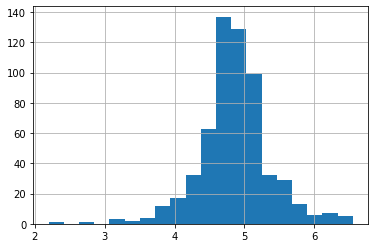

In [15]:
#Normalizing the LoanAmount data
dataset["LoanAmount_log"]=np.log(dataset["LoanAmount"])
dataset["LoanAmount_log"].hist(bins=20)

In [16]:
#Missing terms number in each column

dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [17]:
#Replacing NULL values with a specified values in each column

dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace=True)
dataset["Married"].fillna(dataset["Gender"].mode()[0],inplace=True)
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)
dataset["Self_Employed"].fillna(dataset["Self_Employed"].mode()[0],inplace=True)
dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean(),inplace=True)
dataset["LoanAmount_log"].fillna(dataset["LoanAmount_log"].mean(),inplace=True)
dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mean(),inplace=True)
dataset["Credit_History"].fillna(dataset["Credit_History"].mean(),inplace=True)




In [18]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<AxesSubplot:>

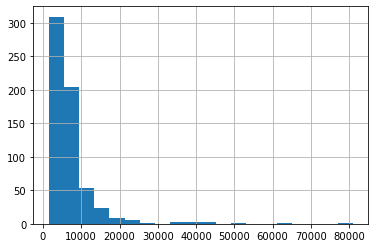

In [19]:
dataset["Totalincome"]=dataset["ApplicantIncome"] + dataset["CoapplicantIncome"]
dataset["Totalincome"].hist(bins=20)

<AxesSubplot:>

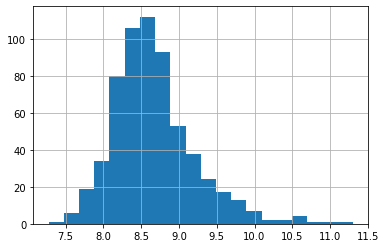

In [20]:
#Normalizing the Totalincome values
dataset["Totalincome_log"]= np.log(dataset["Totalincome"])
dataset["Totalincome_log"].hist(bins=20)

In [21]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Totalincome,Totalincome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [22]:
#Extracting Independent and dependent Variable 
# x - Independent variables
# y - Dependent variables
x= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y=dataset.iloc[:,12].values

In [23]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [24]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [25]:
#Labelling the values which contains other than integers
from sklearn.preprocessing import LabelEncoder
label_x=LabelEncoder()
for i in range(0,5):
    x[:,i]=label_x.fit_transform(x[:,i])
x[:,7]=label_x.fit_transform(x[:,7])
label_y=LabelEncoder()
y = label_y.fit_transform(y)








In [26]:
x

array([[1, 1, 0, ..., 1.0, 4.857444178729353, 320],
       [1, 2, 1, ..., 1.0, 4.852030263919617, 333],
       [1, 2, 0, ..., 1.0, 4.189654742026425, 42],
       ...,
       [1, 2, 1, ..., 1.0, 5.53338948872752, 436],
       [1, 2, 2, ..., 1.0, 5.231108616854587, 416],
       [0, 1, 0, ..., 0.0, 4.890349128221754, 185]], dtype=object)

In [27]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [141]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [142]:
x_train

array([[1, 2, 0, ..., 1.0, 4.74493212836325, 183],
       [0, 1, 0, ..., 0.0, 4.330733340286331, 79],
       [1, 2, 2, ..., 1.0, 4.890349128221754, 323],
       ...,
       [1, 2, 3, ..., 1.0, 5.298317366548036, 438],
       [1, 2, 0, ..., 1.0, 5.075173815233827, 328],
       [0, 2, 0, ..., 1.0, 5.204006687076795, 363]], dtype=object)

In [143]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [162]:
#Using Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion='gini',random_state=0)
DTclassifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [163]:
#Predicting the test set result  
y_pred= DTclassifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [164]:
#Calculate accuracy
from sklearn import metrics
print('Accuracy of DTclassifier is : ',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy of DTclassifier is :  61.29032258064516


In [185]:
#Using Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=50)
RFclassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [186]:
y_pred= RFclassifier.predict(x_test)
print("Accuracy is : ",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy is :  75.80645161290323


In [187]:
#Using Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train,y_train)

GaussianNB()

In [188]:
y_pred = NBclassifier.predict(x_test)
print("Accuracy is : ",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy is :  87.09677419354838


In [189]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 88.70967741935483


In [190]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cm

array([[ 9,  6],
       [ 1, 46]], dtype=int64)

In [191]:
 #Fitting KNN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=50,metric='minkowski',p=2)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 83.87096774193549


In [192]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_test, y_pred)  
cm1

array([[ 6,  9],
       [ 1, 46]], dtype=int64)

In [193]:
#Using SVM classifier to the training set
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 87.09677419354838
